In [1]:
import os
import utils
import models
import tensorflow as tf
#from tensorflow.keras import losses, optimizers, callbacks

In [2]:
base=os.getcwd()
train_dir=os.path.join(base,"DIV2K_train_HR")
test_dir=os.path.join(base, "DIV2K_test_HR")
print("Base = {}".format(base))
print("Train = {}".format(train_dir))
print("Test = {}".format(test_dir))

Base = D:\DS294
Train = D:\DS294\DIV2K_train_HR
Test = D:\DS294\DIV2K_test_HR


In [3]:
crop_size = 500
sr_factor = 4
input_size = crop_size // sr_factor
batch_size = 24
val_split = 0.1
utils.showplot =1 #Set 1 to show plots in output
utils.res_fraction = 0.6 #Fraction of the original resolution at which the plots will be saved

In [4]:
ds_train, ds_valid = utils.define_datasets(train_dir, batch_size, crop_size, val_split)
ds_train, ds_valid = utils.map_datasets(ds_train, ds_valid)
test_paths = utils.generate_test_paths(test_dir)
ds_train, ds_valid = utils.transform_ds(ds_train, ds_valid, input_size, sr_factor)

Found 2400 files belonging to 1 classes.
Using 2160 files for training.
Found 2400 files belonging to 1 classes.
Using 240 files for validation.


Model: "SR-RESNET"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 640         input_1[0][0]                    
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, None, None, 6 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       p_re_lu[0][0]                    
__________________________________________________________________________________________

D:\DS294\utils.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


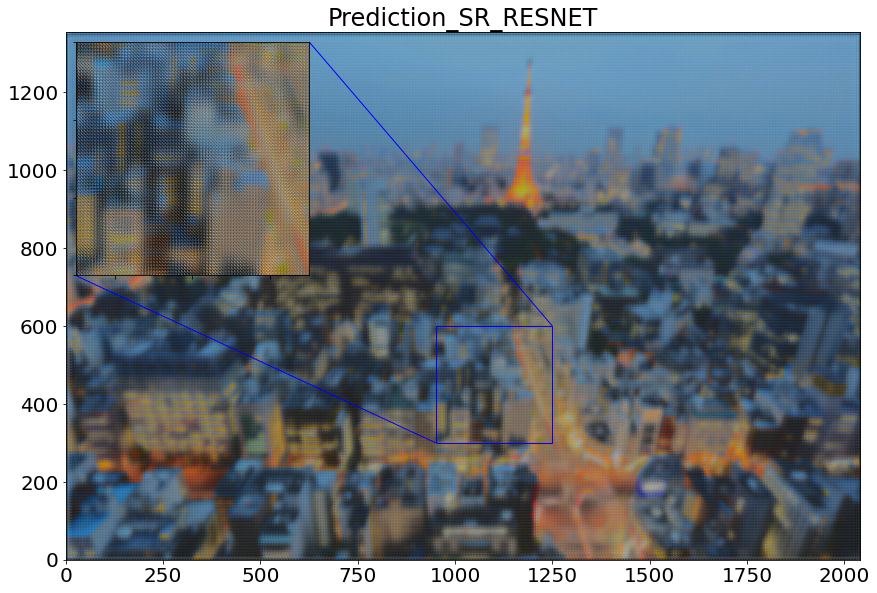

Epoch 2/101
90/90 [==============================] - 59s 612ms/step - loss: 0.0320 - val_loss: 0.0358
Average value of PSNR for current epoch: 14.35
Epoch 3/101
90/90 [==============================] - 60s 622ms/step - loss: 0.0228 - val_loss: 0.0249
Average value of PSNR for current epoch: 15.95
Epoch 4/101
90/90 [==============================] - 61s 630ms/step - loss: 0.0181 - val_loss: 0.0192
Average value of PSNR for current epoch: 17.28
Epoch 5/101
90/90 [==============================] - 61s 633ms/step - loss: 0.0153 - val_loss: 0.0169
Average value of PSNR for current epoch: 17.62
Epoch 6/101
90/90 [==============================] - 61s 635ms/step - loss: 0.0143 - val_loss: 0.0164
Average value of PSNR for current epoch: 17.86
Epoch 7/101
90/90 [==============================] - 61s 636ms/step - loss: 0.0130 - val_loss: 0.0149
Average value of PSNR for current epoch: 18.26
Epoch 8/101
90/90 [==============================] - 62s 643ms/step - loss: 0.0130 - val_loss: 0.0129
Aver

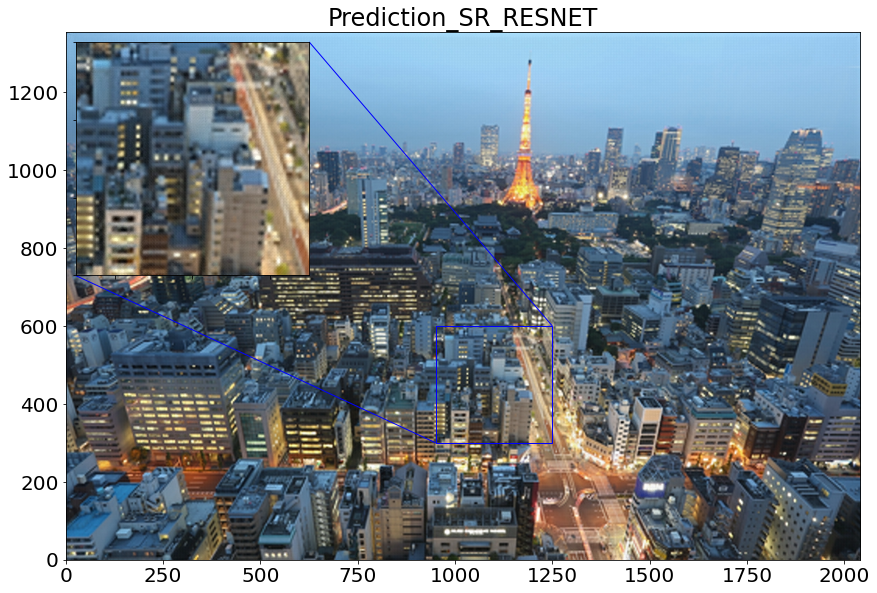

Epoch 52/101
90/90 [==============================] - 63s 651ms/step - loss: 0.0072 - val_loss: 0.0067
Average value of PSNR for current epoch: 22.02
Epoch 53/101
90/90 [==============================] - 63s 649ms/step - loss: 0.0070 - val_loss: 0.0078
Average value of PSNR for current epoch: 21.04
Epoch 54/101
90/90 [==============================] - 63s 651ms/step - loss: 0.0070 - val_loss: 0.0069
Average value of PSNR for current epoch: 21.51
Epoch 55/101
90/90 [==============================] - 63s 649ms/step - loss: 0.0069 - val_loss: 0.0064
Average value of PSNR for current epoch: 21.94
Epoch 56/101
90/90 [==============================] - 63s 652ms/step - loss: 0.0068 - val_loss: 0.0066
Average value of PSNR for current epoch: 21.76
Epoch 57/101
90/90 [==============================] - 62s 647ms/step - loss: 0.0068 - val_loss: 0.0065
Average value of PSNR for current epoch: 21.86
Epoch 58/101
90/90 [==============================] - 63s 651ms/step - loss: 0.0067 - val_loss: 0.00

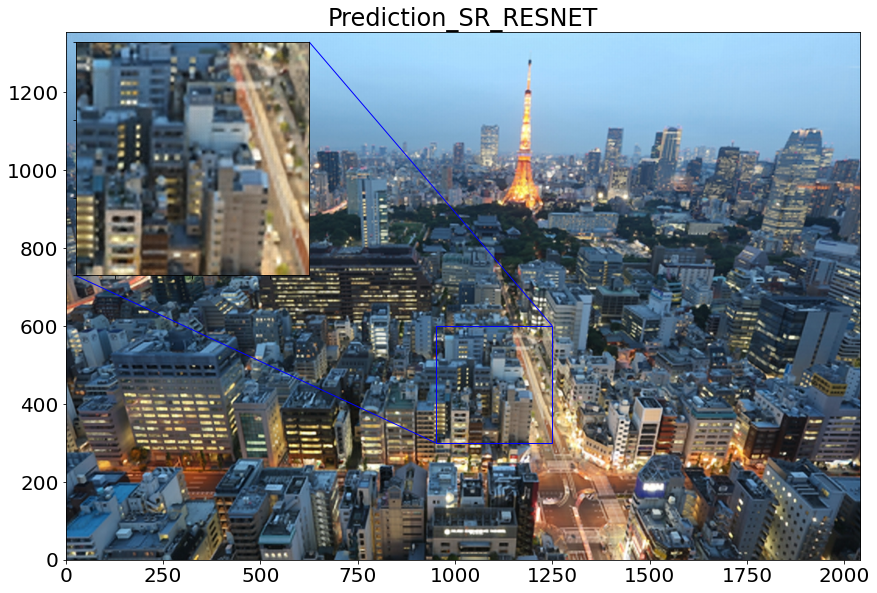

In [5]:
model_name ="SR_RESNET"
model = models.SR_RESNET(sr_factor=sr_factor, channels=1, res_blocks = 4)
model.summary()
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=20)
callbacks = [utils.SRCallback(test_paths, sr_factor, model_name), early_stop]
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

epochs = 101
model.compile(optimizer=optimizer, loss=loss_fn,)
r = model.fit(ds_train, epochs=epochs, callbacks=callbacks, validation_data=ds_valid, verbose=1)
model.save(model_name + '.h5')

PSNR of LR and HR image: 33.44548
SSIM of LR and HR image: 0.91359
PSNR of Predicted and HR image: 33.75291
SSIM of Predicted and HR image: 0.90140
D:\DS294


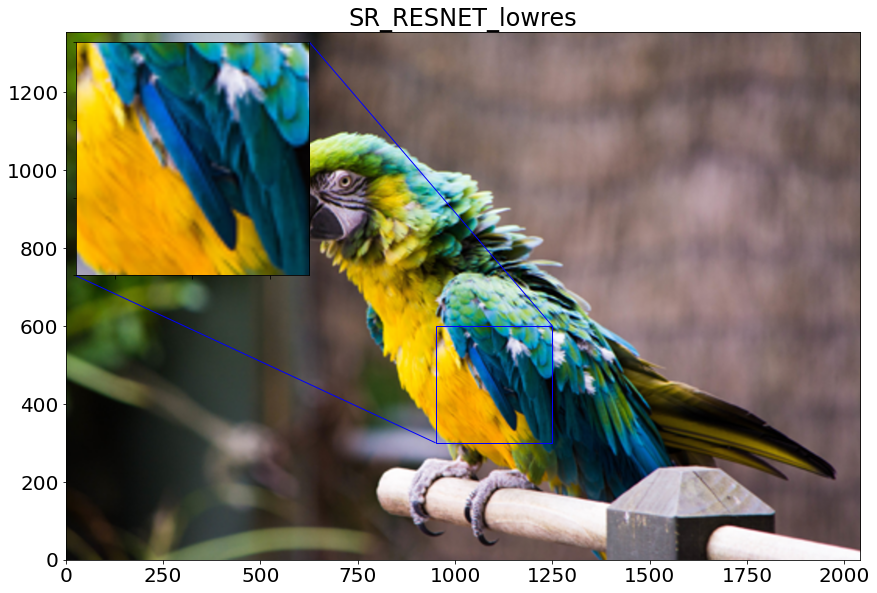

D:\DS294


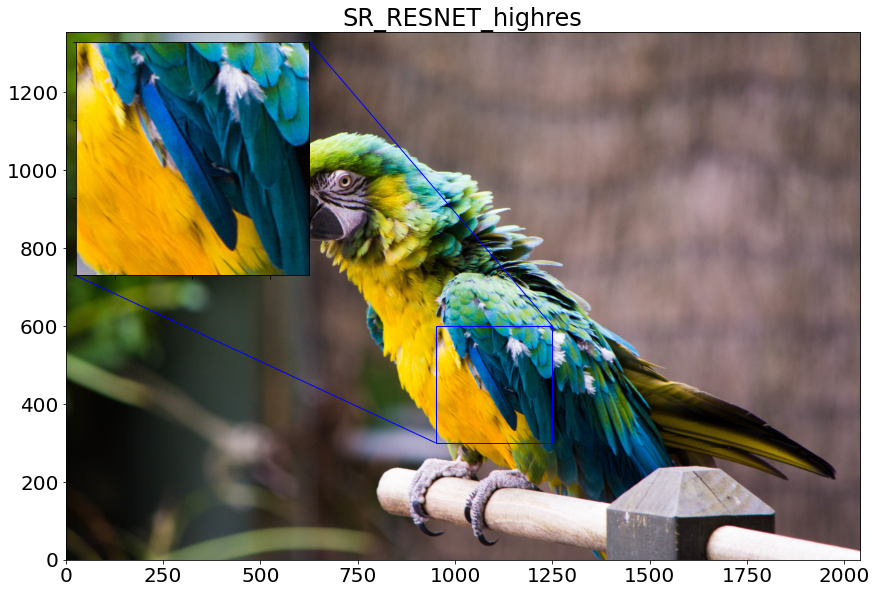

D:\DS294


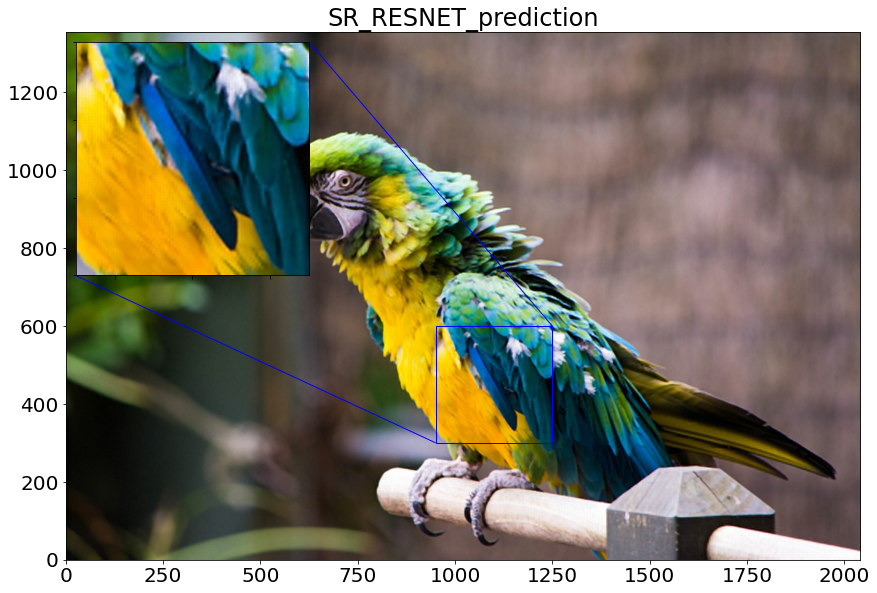

Avg. PSNR of LR and HR images is 26.6400
Avg. SSIM of LR and HR images is 0.7482
Avg. PSNR of Predictions and HR images is 27.0794
Avg. SSIM of Predictions and HR images is 0.7529
Avg. Inference Time is 0.1850 s


In [6]:
saved_model = tf.keras.models.load_model(model_name + '.h5')
utils.inference(saved_model, test_paths, sr_factor, model_name)

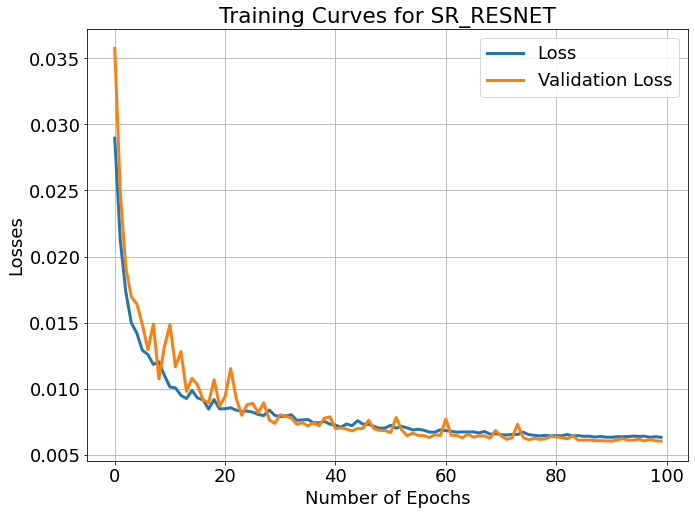

In [9]:
utils.training_stats(r, model_name)